SOCIO ECONOMIC HEALTH DISPARITY

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [267]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "SES_RAW DATA/morbidity/DEMO_L.XPT",     # Demographics
#     "DIQ_L": "SES_RAW DATA/morbidity/DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "SES_RAW DATA/morbidity/HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "SES_RAW DATA/morbidity/HEQ_L.XPT",       # Hepatitis B
#     "HOQ_L": "SES_RAW DATA/morbidity/HOQ_L.XPT",       # Housing
#     "HSQ_L": "SES_RAW DATA/morbidity/HSQ_L.XPT",       # HIV
#     "INQ_L": "SES_RAW DATA/morbidity/INQ_L.XPT",       # Total Savings
#     "KIQ_U_L": "SES_RAW DATA/morbidity/KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "SES_RAW DATA/morbidity/MCQ_L.XPT",       # Disease, ..., etc.
#     "OCQ_L": "SES_RAW DATA/morbidity/OCQ_L.XPT",       # Occupational
#     "RXQ_RX_L": "SES_RAW DATA/morbidity/RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "IND310", # Total savings (INQ_L)
#     # "OCD150",  # Occupational (OCQ_L)
#     "HOD051", # Housing (HOQ_L)
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("SES_RAW DATA/morbidity/NHANES_SES_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_RawData.csv'")

In [268]:
file = "SES_RAW DATA/morbidity/NHANES_SES_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,IND310,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130381.0,5.0,2.0,4.0,1.53,1.0,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
4,130382.0,2.0,1.0,4.0,3.60,1.0,8.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [269]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'IND310',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [270]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'Housing', # Housing
    'Diabetes', # Diabetes
    'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,TotalSavings,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130381.0,5.0,2.0,4.0,1.53,1.0,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
4,130382.0,2.0,1.0,4.0,3.60,1.0,8.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       11933 non-null  float64
 1   Age                        11933 non-null  float64
 2   Gender                     11933 non-null  float64
 3   Education                  11933 non-null  float64
 4   FamilyIncomeRatio          11933 non-null  float64
 5   TotalSavings               11933 non-null  float64
 6   Housing                    11933 non-null  float64
 7   Diabetes                   11933 non-null  float64
 8   Asthma                     11933 non-null  float64
 9   CongestiveHeartFailure     11933 non-null  float64
 10  CoronaryHeartDisease       11933 non-null  float64
 11  HeartAttack                11933 non-null  float64
 12  ThyroidProblem             11933 non-null  float64
 13  Emphysema                  11933 non-null  flo

In [272]:
df.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,TotalSavings,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,11933.000000,1.193300e+04,11933.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,...,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,136344.000000,3.831786e+01,1.532808,3.872622,2.672569e+00,2.234141,5.847817,1.935557,1.845722,1.981229,...,1.922735,1.960697,1.971675,1.938574,1.905807,1.867091,1.304953,2.011229,1.980726,1.481187
std,3444.904716,2.560199e+01,0.498943,0.937021,1.522605e+00,9.221607,5.103025,0.355909,0.448203,0.313379,...,0.397862,0.321663,0.290137,0.380330,0.337376,0.400009,0.471913,0.388238,0.282696,0.550122
min,130378.000000,5.397605e-79,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,133361.000000,1.300000e+01,1.000000,4.000000,1.420000e+00,1.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,136344.000000,3.700000e+01,2.000000,4.000000,2.500000e+00,1.000000,5.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,139327.000000,6.200000e+01,2.000000,4.000000,4.000000e+00,1.000000,7.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,142310.000000,8.000000e+01,2.000000,9.000000,5.000000e+00,99.000000,99.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [273]:
# display the number for each unique values for each disease

disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
                   'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
                     'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 'TakenPrescriptionMedicine']

for col in disease_columns:
    print(df[col].value_counts(), '\n')


Diabetes
2.0    10564
1.0     1081
3.0      284
9.0        4
Name: count, dtype: int64 

Asthma
2.0    9972
1.0    1946
9.0      15
Name: count, dtype: int64 

CongestiveHeartFailure
2.0    11573
1.0      343
9.0       17
Name: count, dtype: int64 

CoronaryHeartDisease
2.0    11497
1.0      402
9.0       34
Name: count, dtype: int64 

HeartAttack
2.0    11588
1.0      332
9.0       13
Name: count, dtype: int64 

ThyroidProblem
2.0    10861
1.0     1053
9.0       18
7.0        1
Name: count, dtype: int64 

Emphysema
2.0    11352
1.0      567
9.0       14
Name: count, dtype: int64 

LiverCondition
2.0    11495
1.0      425
9.0       11
7.0        2
Name: count, dtype: int64 

Gallstone
2.0    11050
1.0      864
9.0       18
7.0        1
Name: count, dtype: int64 

CancerOrMalignancy
2.0    10757
1.0     1169
9.0        5
7.0        2
Name: count, dtype: int64 

HIV
2.0    10269
1.0     1654
9.0        9
7.0        1
Name: count, dtype: int64 

HepatitisA
1.0    8358
2.0    3511
3.0     

In [274]:
# make the non value for 1 or 2 to NaN in desease columns

for col in disease_columns:
    df[col] = df[col].replace({3: np.nan, 7: np.nan, 9: np.nan})
    print(df[col].value_counts(), '\n')

# make the 1 to 0 and 2 to 1 in diseases column

for col in disease_columns:
    df[col] = df[col].replace({2: 0})



Diabetes
2.0    10564
1.0     1081
Name: count, dtype: int64 

Asthma
2.0    9972
1.0    1946
Name: count, dtype: int64 

CongestiveHeartFailure
2.0    11573
1.0      343
Name: count, dtype: int64 

CoronaryHeartDisease
2.0    11497
1.0      402
Name: count, dtype: int64 

HeartAttack
2.0    11588
1.0      332
Name: count, dtype: int64 

ThyroidProblem
2.0    10861
1.0     1053
Name: count, dtype: int64 

Emphysema
2.0    11352
1.0      567
Name: count, dtype: int64 

LiverCondition
2.0    11495
1.0      425
Name: count, dtype: int64 

Gallstone
2.0    11050
1.0      864
Name: count, dtype: int64 

CancerOrMalignancy
2.0    10757
1.0     1169
Name: count, dtype: int64 

HIV
2.0    10269
1.0     1654
Name: count, dtype: int64 

HepatitisA
1.0    8358
2.0    3511
Name: count, dtype: int64 

HepatitisB
2.0    11789
1.0      109
Name: count, dtype: int64 

WeakFailingKidney
2.0    11599
1.0      321
Name: count, dtype: int64 

TakenPrescriptionMedicine
1.0    6280
2.0    5638
Name: count, 

In [275]:
# df['TotalSavings'] = df['TotalSavings'].replace({77: np.nan, 99: np.nan})
df[['Education', 'Housing', 'TotalSavings']] = df[['Education', 'Housing', 'TotalSavings']].replace({7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan})

In [276]:
# fill the NaN values with the median of the column
df.fillna(df.mode(), inplace=True)

In [277]:
for col in df.columns:
    print(df[col].value_counts(), '\n')

SEQN
130378.0    1
138337.0    1
138328.0    1
138329.0    1
138330.0    1
           ..
134358.0    1
134359.0    1
134360.0    1
134361.0    1
142310.0    1
Name: count, Length: 11933, dtype: int64 

Age
80.0    525
8.0     257
5.0     246
4.0     229
12.0    228
       ... 
79.0     82
23.0     82
47.0     76
78.0     73
20.0     71
Name: count, Length: 81, dtype: int64 

Gender
2.0    6358
1.0    5575
Name: count, dtype: int64 

Education
4.0    6509
5.0    2625
3.0    1749
2.0     666
1.0     373
Name: count, dtype: int64 

FamilyIncomeRatio
5.000000e+00    2149
2.500000e+00    2066
5.397605e-79     100
1.850000e+00      74
2.160000e+00      64
                ... 
4.080000e+00       1
4.950000e+00       1
3.610000e+00       1
2.900000e+00       1
4.870000e+00       1
Name: count, Length: 471, dtype: int64 

TotalSavings
1.0    10233
2.0      579
3.0      485
4.0      338
5.0      167
Name: count, dtype: int64 

Housing
5.0     3580
6.0     1965
4.0     1879
3.0      950
8.0      

In [278]:
df.columns

Index(['SEQN', 'Age', 'Gender', 'Education', 'FamilyIncomeRatio',
       'TotalSavings', 'Housing', 'Diabetes', 'Asthma',
       'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
       'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone',
       'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB',
       'WeakFailingKidney', 'TakenPrescriptionMedicine'],
      dtype='object')

In [279]:
#Creating a new column called SES_Score which is the sum of the SES columns

df["SES_Score"] = df[["TotalSavings", "Education", "FamilyIncomeRatio", "Housing"]].sum(axis=1)

df.drop(columns=["TotalSavings", "Education", "FamilyIncomeRatio", "Housing"], inplace=True)

In [280]:
# try to group the diseases features into one

# Sum all disease-related columns to create a health score
df['HealthIndicator'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                            'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                      'TakenPrescriptionMedicine'])


In [281]:
# # use get_dummies to convert the disease columns to binary columns
# df = pd.get_dummies(df, columns=disease_columns, drop_first=True)


In [282]:
df.head()

,SEQN,Age,Gender,SES_Score,HealthIndicator
0,130378.0,43.0,1.0,21.00,2.0
1,130379.0,66.0,1.0,11.00,3.0
2,130380.0,44.0,2.0,11.41,5.0
3,130381.0,5.0,2.0,10.53,2.0
4,130382.0,2.0,1.0,16.60,1.0


In [55]:
df.shape

(6064, 8)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             11933 non-null  float64
 1   Age              11933 non-null  float64
 2   Gender           11933 non-null  float64
 3   SES_Score        11933 non-null  float64
 4   HealthIndicator  11933 non-null  float64
dtypes: float64(5)
memory usage: 466.3 KB


In [284]:
df.drop(columns=['SEQN', 'Age', 'Gender'], inplace=True)

### Kmeans

In [285]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [286]:
df.head()

,SES_Score,HealthIndicator
0,21.00,2.0
1,11.00,3.0
2,11.41,5.0
3,10.53,2.0
4,16.60,1.0


In [287]:
df_scaled.head()

,SES_Score,HealthIndicator
0,2.537551,-0.058865
1,-0.357475,0.617852
2,-0.238779,1.971285
3,-0.493541,-0.058865
4,1.263739,-0.735581


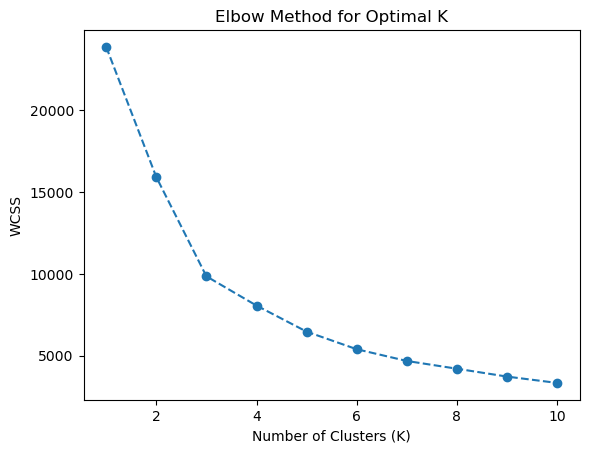

In [288]:
# try elbow method
 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [289]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [290]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df_scaled.drop(columns=['cluster']))

# df_scaled['PCA1'] = pca_result[:, 0]
# df_scaled['PCA2'] = pca_result[:, 1]
# # df_scaled['PCA3'] = pca_result[:, 2]

In [291]:
df_scaled.head(10)

,SES_Score,HealthIndicator,cluster
0,2.537551,-0.058865,2
1,-0.357475,0.617852,1
2,-0.238779,1.971285,0
3,-0.493541,-0.058865,1
4,1.263739,-0.735581,2
5,0.076779,-0.735581,1
6,-1.622602,-0.735581,1
7,1.379541,-0.058865,2
8,-0.551442,-0.735581,1
9,-1.422845,-0.058865,1


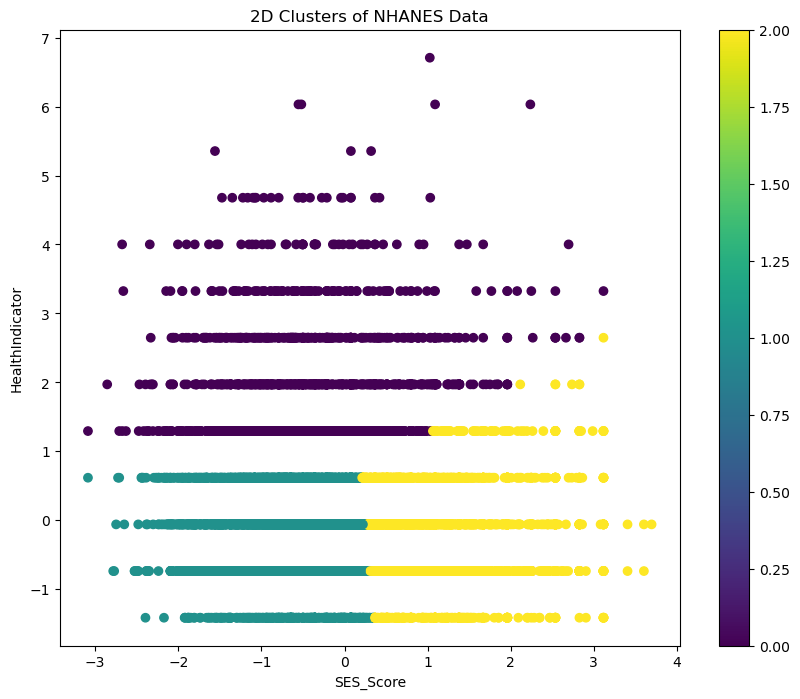

In [292]:
# Visualize Clusters in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(df_scaled['PCA1'], df_scaled['PCA2'], df_scaled['PCA3'], c=df_scaled['cluster'], cmap='viridis')
# ax.set_xlabel("PCA1")
# ax.set_ylabel("PCA2")
# ax.set_zlabel("PCA3")
# plt.title("3D Clusters of NHANES Data")
# plt.colorbar(sc)
# plt.show()

# Visualize Clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled['SES_Score'], df_scaled['HealthIndicator'], c=df_scaled['cluster'], cmap='viridis')
plt.xlabel("SES_Score")
plt.ylabel("HealthIndicator")
plt.title("2D Clusters of NHANES Data")
plt.colorbar()
plt.show()

In [293]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, df_scaled['cluster'])


0.4908681628024052

### DB Scan

In [294]:
dbscan_df = df.copy()
dbscan_df.head()

,SES_Score,HealthIndicator
0,21.00,2.0
1,11.00,3.0
2,11.41,5.0
3,10.53,2.0
4,16.60,1.0


In [295]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dbscan_df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=dbscan_df.columns)

In [296]:
X_dbscan_face, X_test = train_test_split(dbscan_df, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_dbscan_face)

In [297]:
X_dbscan_face['cluster'] = kmeans.labels_

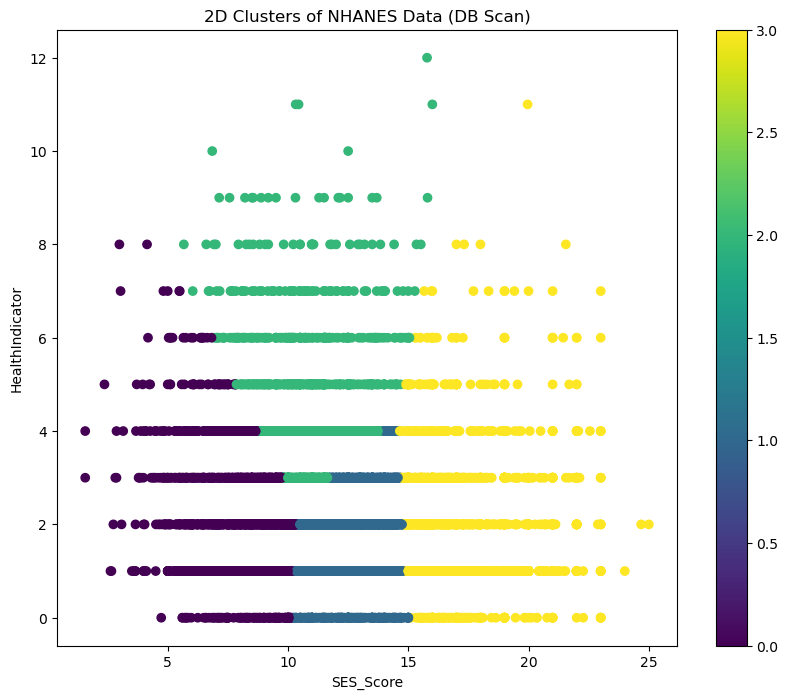

In [298]:
plt.figure(figsize=(10, 8))
plt.scatter(X_dbscan_face['SES_Score'], X_dbscan_face['HealthIndicator'], c=X_dbscan_face['cluster'], cmap='viridis')
plt.xlabel("SES_Score")
plt.ylabel("HealthIndicator")
plt.title("2D Clusters of NHANES Data (DB Scan)")
plt.colorbar()
plt.show()

### Plot cluster to each diseases

In [299]:
# # plot each disease against the cluster

# # Create a new DataFrame for plotting
# df_plot = df_scaled[['cluster']].copy()

# # # Add disease columns to the plotting DataFrame
# # desease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
# #                       'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
# #                       'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
# #                       'TakenPrescriptionMedicine']

# df_plot[disease_columns] = df[disease_columns]

# # Plot each disease against the cluster
# for disease in disease_columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='cluster', y=disease, data=df_plot)
#     plt.title(f'Cluster vs {disease}')
#     plt.show()
